<a href="https://colab.research.google.com/github/worldofaryavart/colab_notebooks/blob/colabnotebook/neural_network_classification_pytorch3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###architecture of a classification model


In [ ]:
#make classification data and get it ready
import sklearn


In [ ]:
from sklearn.datasets import make_circles
n_samples = 1000

#create circles
X, y = make_circles(n_samples, noise=0.03, random_state=42)

In [ ]:
print(f"First 5 samples of x: {X[:5]}")
print(f"First 5 samples of y: {y[:5]}")

In [ ]:
import pandas as pd
circles = pd.DataFrame({"x0":X[:, 0], "x1":X[:, 1], "label":y})
circles.head(10)

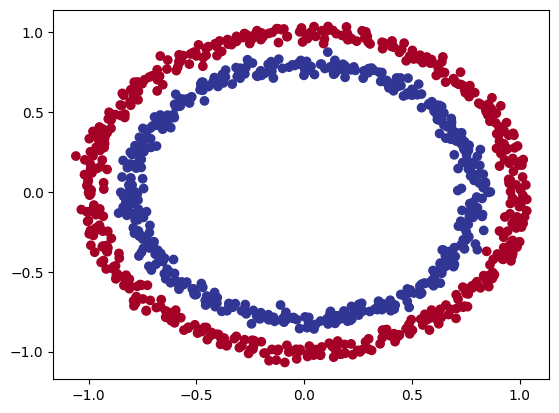

In [ ]:
# visualize
import matplotlib.pyplot as plt
plt.scatter(x = X[:, 0],
            y = X[:, 1],
            c = y,
            cmap = plt.cm.RdYlBu)
plt.show()

###  Check input and output shapes

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
# view the first example of features and labels
X_samples = X[0]
y_samples = y[0]
print(f"Values for one sample of X: {X_samples}")
print(f"Value for one sample of y: {y_samples}")

Values for one sample of X: [0.75424625 0.23148074]
Value for one sample of y: 1


In [ ]:
print(f"Shape for one sample of X: {X_samples.shape}")
print(f"Shape for one sample of y: {y_samples.shape}")

Shape for one sample of X: (2,)
Shape for one sample of y: ()


### Turn data into tensors and cerate train and test splits

In [ ]:
type(X)

numpy.ndarray

In [ ]:
import torch
torch.__version__

'2.3.1+cu121'

In [ ]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [ ]:
X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [ ]:
type(X), X.dtype, y.dtype

(torch.Tensor, torch.float32, torch.float32)

In [ ]:
torch.manual_seed(42)

In [ ]:
# Split data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
len(X_train), len(X_test),len(y_train), len(y_test)

(800, 200, 800, 200)

### Building a model

In [ ]:
import torch
from torch import nn
# make device  agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
X_train

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        ...,
        [ 0.0157, -1.0300],
        [ 1.0110,  0.1680],
        [ 0.5578, -0.5709]])

In [ ]:
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=5)
    self.layer_2 = nn.Linear(in_features=5, out_features=1)

  def forward(self, x):
    return self.layer_2(self.layer_1(x))

model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
next(model_0.parameters()).device

device(type='cuda', index=0)

In [ ]:
#Let's replicate the model above using nn.Sequential()

model_0 = nn.Sequential(
    nn.Linear(in_features = 2, out_features = 5),
    nn.Linear(in_features = 5, out_features = 1),
).to(device)
model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0829, -0.2872],
                      [ 0.4691, -0.5582],
                      [-0.3260, -0.1997],
                      [-0.4252,  0.0667],
                      [-0.6984,  0.6386]], device='cuda:0')),
             ('0.bias',
              tensor([-0.6007,  0.5459,  0.1177, -0.2296,  0.4370], device='cuda:0')),
             ('1.weight',
              tensor([[ 0.0697,  0.3613,  0.0489, -0.1410,  0.1202]], device='cuda:0')),
             ('1.bias', tensor([-0.1213], device='cuda:0'))])

In [ ]:
 # Make predicions
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))
print(f" \nLength of predictions: {len(untrained_preds)}, shape: {untrained_preds.shape}")
print(f"\nLenght of test samples: {len(X_test)}, Shape: {X_test.shape}")
print(f"\nFirst 10 predictions: {untrained_preds[:10]}")
print(f"First 10 labels: {y_test[:10]}")


 
Length of predictions: 200, shape: torch.Size([200, 1])

Lenght of test samples: 200, Shape: torch.Size([200, 2])

First 10 predictions: tensor([[-0.0338],
        [-0.0309],
        [ 0.0894],
        [-0.0692],
        [ 0.2967],
        [ 0.2968],
        [ 0.1405],
        [ 0.2178],
        [ 0.0805],
        [-0.0284]], device='cuda:0')
First 10 labels: tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [ ]:
X_test[:10], y_test[:10]

(tensor([[-0.3752,  0.6827],
         [ 0.0154,  0.9600],
         [-0.7028, -0.3147],
         [-0.2853,  0.9664],
         [ 0.4024, -0.7438],
         [ 0.6323, -0.5711],
         [ 0.8561,  0.5499],
         [ 1.0034,  0.1903],
         [-0.7489, -0.2951],
         [ 0.0538,  0.9739]]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

In [ ]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params = model_0.parameters(), lr = 0.1)

In [ ]:
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct / len(y_pred)) * 100
  return acc

### training a model

In [ ]:
model_0

In [ ]:
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]
y_logits

In [ ]:
y_test[:5]

In [ ]:
# use the sigmode activation function on our model logits to turn this into prediction probabilities
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

In [ ]:
y_preds = torch.round(y_pred_probs)

y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

y_preds.squeeze()

In [ ]:
torch.manual_seed(42)
epochs = 100
X_train, y_train, X_test, y_test = X_train.to(device), y_train.to(device), X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  model_0.train()
  # 1. Forward pass
  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  # 2. Calculate loss and accuracy
  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true = y_train, y_pred = y_pred)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  model_0.eval()
  with torch.inference_mode():
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true = y_test, y_pred = test_pred)

  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")



In [ ]:
import requests
from pathlib import Path
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download...")
  pass
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)
    print("Download complete")

from helper_functions import plot_predictions, plot_decision_boundary

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

In [ ]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features = 2, out_features = 10)
    self.layer_2 = nn.Linear(in_features = 10, out_features = 10)
    self.layer_3 = nn.Linear(in_features = 10, out_features = 1)
    self.relu = nn.ReLU()

  def forward(self, x):
    z = self.layer_1(x)
    z = self.relu(z)
    z = self.layer_2(z)
    z = self.relu(z)
    z = self.layer_3(z)

    return z

  def predict(self, x):
    with torch.inference_mode():
      return torch.round(torch.sigmoid(self.forward(x)))

In [ ]:
model_1 = CircleModelV1().to(device)
model_1

In [ ]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params = model_1.parameters(), lr = 0.1)

In [ ]:
torch.manual_seed(42)

epochs = 1000
X_train, y_train, X_test, y_test = X_train.to(device), y_train.to(device), X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  model_1.train() # train mode
  # 1. Forward pass
  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  # 2. Calculate loss
  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true = y_train, y_pred = y_pred)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  model_1.eval()
  with torch.inference_mode():
    test_logits = model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true = y_test, y_pred = test_pred)

  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")




In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

## Building neural network from scratch

In [ ]:
import torch
from torch import nn
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
n_samples = 1000

In [ ]:
X, y = make_circles(n_samples, noise=0.03, random_state = 42)

In [ ]:
X[:10], y[:10]
X.shape, y.shape
X.dtype, y.dtype

(dtype('float64'), dtype('int64'))

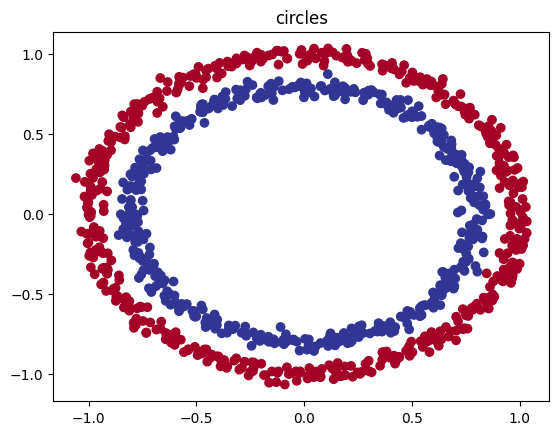

In [ ]:
plt.scatter(x = X[:, 0], y = X[:, 1], c = y, cmap = plt.cm.RdYlBu)
plt.title("circles")
plt.show()

In [ ]:
type(X), type(y)

(numpy.ndarray, numpy.ndarray)

In [ ]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)
print(f"X shape: {X.shape} | y shape: {y.shape}")
print(f"X type: {X.dtype} | y dtype: {y.dtype}")
print(f"X tensor type: {type(X)} | y tensor type: {type(y)}")
print(f"X samples: {X[:5]} | y samples: {y[:5]}")

X shape: torch.Size([1000, 2]) | y shape: torch.Size([1000])
X type: torch.float32 | y dtype: torch.float32
X tensor type: <class 'torch.Tensor'> | y tensor type: <class 'torch.Tensor'>
X samples: tensor([[ 0.7542,  0.2315],
        [-0.7562,  0.1533],
        [-0.8154,  0.1733],
        [-0.3937,  0.6929],
        [ 0.4422, -0.8967]]) | y samples: tensor([1., 1., 1., 1., 0.])


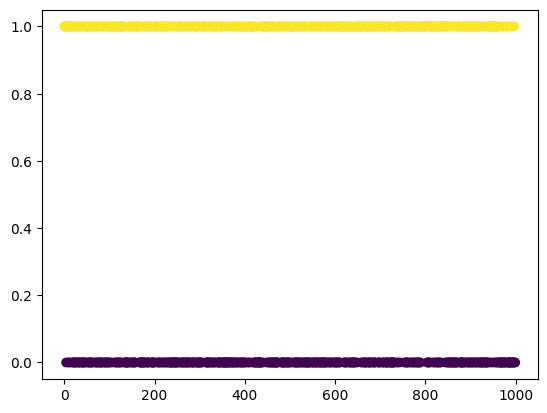

In [ ]:
plt.scatter(range(len(y)), y, c =y)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, X_test.shape

(torch.Size([800, 2]), torch.Size([200, 2]))

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
class CircleModelV3(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features = 2, out_features = 10)
    self.layer_2 = nn.Linear(in_features = 10, out_features = 10)
    self.layer_3 = nn.Linear(in_features = 10, out_features = 1)
    self.relu = nn.ReLU()

  def forward(self, x):
    z = self.layer_1(x)
    z = self.relu(z)
    z = self.layer_2(z)
    z = self.relu(z)
    z = self.layer_3(z)
    return z

model_3 = CircleModelV3().to(device)

In [ ]:
model_3

CircleModelV3(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params = model_3.parameters(), lr = 0.1)

In [ ]:
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct / len(y_pred)) * 100
  return acc

In [ ]:
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test  = X_test.to(device), y_test.to(device)

In [ ]:
# training loop
torch.manual_seed(42)
epochs = 1000

for epoch in range(epochs):
  # forward pass
  model_3.train()
  y_logits = model_3(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  # calculate the loss
  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true = y_train, y_pred = y_pred)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  with torch.inference_mode():
    test_logits = model_3(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true = y_test, y_pred = test_pred)

  if epoch % 100 ==0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.56818, Accuracy: 87.75% | Test loss: 0.57378, Test acc: 86.50%
Epoch: 100 | Loss: 0.48153, Accuracy: 93.50% | Test loss: 0.49935, Test acc: 90.50%
Epoch: 200 | Loss: 0.37056, Accuracy: 97.75% | Test loss: 0.40595, Test acc: 92.00%
Epoch: 300 | Loss: 0.25458, Accuracy: 99.00% | Test loss: 0.30333, Test acc: 96.50%
Epoch: 400 | Loss: 0.17180, Accuracy: 99.50% | Test loss: 0.22108, Test acc: 97.50%
Epoch: 500 | Loss: 0.12188, Accuracy: 99.62% | Test loss: 0.16512, Test acc: 99.00%
Epoch: 600 | Loss: 0.09123, Accuracy: 99.88% | Test loss: 0.12741, Test acc: 99.50%
Epoch: 700 | Loss: 0.07100, Accuracy: 99.88% | Test loss: 0.10319, Test acc: 99.50%
Epoch: 800 | Loss: 0.05773, Accuracy: 99.88% | Test loss: 0.08672, Test acc: 99.50%
Epoch: 900 | Loss: 0.04853, Accuracy: 99.88% | Test loss: 0.07474, Test acc: 99.50%


In [ ]:
import requests
from pathlib import Path
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download...")
  pass
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)
    print("Download complete")

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download...


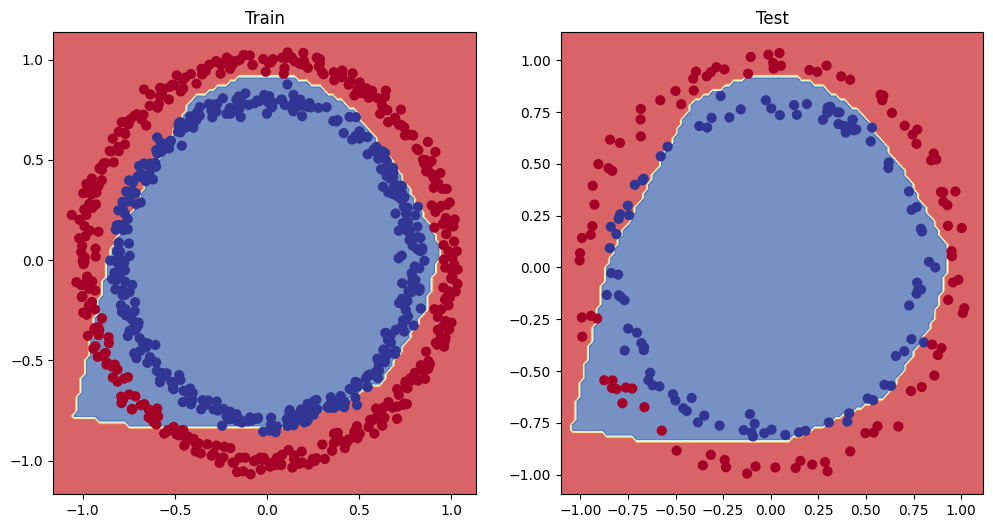

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_3, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test)

## multiclass classification

In [ ]:
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

In [ ]:
# Set the hyperparameters
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42
X_blob, y_blob = make_blobs(n_samples=1000, n_features=NUM_FEATURES, centers=NUM_CLASSES, random_state=RANDOM_SEED)
X_blob.shape, y_blob.shape

((1000, 2), (1000,))

In [ ]:
type(X_blob), type(y_blob)


(numpy.ndarray, numpy.ndarray)

In [ ]:
X_blob_tensor = torch.from_numpy(X_blob).type(torch.float)
y_blob_tensor = torch.from_numpy(y_blob).type(torch.LongTensor)
print(f"X_blob type: {type(X_blob_tensor)} | y_blob type: {type(y_blob_tensor)}")
print(f"X_blob shape: {X_blob_tensor.shape} | y_blob shape: {y_blob_tensor.shape}")

X_blob type: <class 'torch.Tensor'> | y_blob type: <class 'torch.Tensor'>
X_blob shape: torch.Size([1000, 2]) | y_blob shape: torch.Size([1000])


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_blob_tensor, y_blob_tensor, test_size=0.2, random_state=RANDOM_SEED)
print(f"X_train shape: {X_train.shape} | y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape} | y_test shape: {y_test.shape}")

X_train shape: torch.Size([800, 2]) | y_train shape: torch.Size([800])
X_test shape: torch.Size([200, 2]) | y_test shape: torch.Size([200])


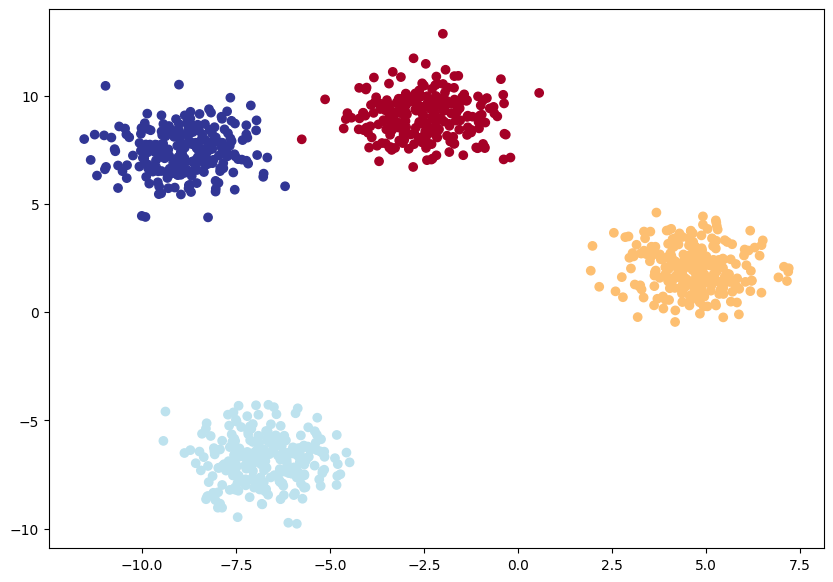

In [ ]:
plt.figure(figsize = (10, 7))
plt.scatter(X_blob_tensor[:, 0], X_blob_tensor[:, 1], c = y_blob_tensor, cmap = plt.cm.RdYlBu)
plt.show()

In [ ]:
type(X_train)

torch.Tensor

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
class CircleModelV4(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features = 2, out_features = 10)
    self.layer_2 = nn.Linear(in_features = 10, out_features = 10)
    self.layer_3 = nn.Linear(in_features = 10, out_features = 4)
    self.relu = nn.ReLU()
    self.softmax = nn.Softmax(dim = 1)
    self.softmax = nn.LogSoftmax(dim = 1)
    # self.softmax = nn.CrossEntropyLoss()

  def forward(self, x):
    z = self.layer_1(x)
    z = self.relu(z)
    z = self.layer_2(z)
    z = self.relu(z)
    z = self.layer_3(z)
    z = self.softmax(z)
    return z

model_4 = CircleModelV4().to(device)

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_4.parameters(), lr = 0.1)

In [ ]:
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct / len(y_pred)) * 100
  return acc

In [ ]:
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

In [ ]:
torch.manual_seed = 42
epochs = 1000

for epoch in range(epochs):
  # forward pass
  model_4.train()
  y_logits = model_4(X_train).squeeze()
  y_pred = torch.softmax(y_logits, dim = 1).argmax(dim = 1)
  # y_pred = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true = y_train, y_pred = y_pred)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  with torch.inference_mode():
    test_logits = model_4(X_test).squeeze()
    test_pred = torch.softmax(test_logits, dim = 1).argmax(dim = 1)
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true = y_test, y_pred = test_pred)

  if epoch % 100 ==0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}% ")

Epoch: 0 | Loss: 1.28384, Accuracy: 45.62% | Test loss: 1.22965, Test acc: 58.50% 
Epoch: 100 | Loss: 0.06969, Accuracy: 99.88% | Test loss: 0.07107, Test acc: 100.00% 
Epoch: 200 | Loss: 0.02122, Accuracy: 99.88% | Test loss: 0.02079, Test acc: 100.00% 
Epoch: 300 | Loss: 0.01145, Accuracy: 99.88% | Test loss: 0.01071, Test acc: 100.00% 
Epoch: 400 | Loss: 0.00781, Accuracy: 99.88% | Test loss: 0.00698, Test acc: 100.00% 
Epoch: 500 | Loss: 0.00598, Accuracy: 99.88% | Test loss: 0.00512, Test acc: 100.00% 
Epoch: 600 | Loss: 0.00490, Accuracy: 99.88% | Test loss: 0.00402, Test acc: 100.00% 
Epoch: 700 | Loss: 0.00419, Accuracy: 99.88% | Test loss: 0.00332, Test acc: 100.00% 
Epoch: 800 | Loss: 0.00369, Accuracy: 99.88% | Test loss: 0.00282, Test acc: 100.00% 
Epoch: 900 | Loss: 0.00332, Accuracy: 99.88% | Test loss: 0.00246, Test acc: 100.00% 


In [ ]:
import requests
from pathlib import Path
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download...")
  pass
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)
    print("Download complete")

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download...


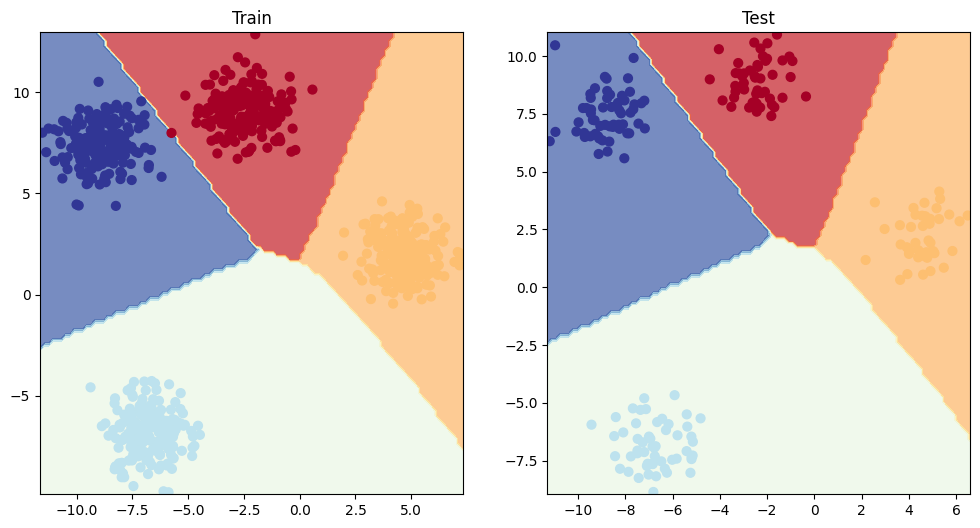

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_4, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_4, X_test, y_test)